## Exercise - Train and evaluate a classification model

### Classification

Supervised machine learning techniques involve training a model to operate on a set of features and predict a label using a dataset that includes some already-known label values. [Denetimli makine öğrenimi teknikleri, bir modelin bir dizi özellik üzerinde çalışması ve önceden bilinen bazı etiket değerlerini içeren bir veri kümesini kullanarak bir etiketi tahmin etmesi için eğitilmesini içerir.] You can think of this function like this, in which y represents the label we want to predict and X represents the vector of features the model uses to predict it. [Bu işlevi şu şekilde düşünebilirsiniz; burada y, tahmin etmek istediğimiz etiketi temsil eder ve X, modelin onu tahmin etmek için kullandığı özniteliklerin vektörünü temsil eder.]

y = f([x1, x2, x3,...])

Classification is a form of supervised machine learning in which you train a model to use the features (the x values in our function) to predict a label (y) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. [Sınıflandırma, bir dizi olası sınıfın her birine ait gözlenen durumun olasılığını hesaplayan bir etiket (y) tahmin etmek için özellikleri (fonksiyonumuzdaki x değerleri) kullanmak üzere bir modeli eğittiğiniz bir denetimli makine öğrenimi biçimidir. ve uygun bir etiketin tahmin edilmesi.] The simplest form of classification is binary classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Internal" or "External"; "Profitable" or "Non-Profitable"; and so on. [En basit sınıflandırma biçimi, iki sınıftan birini temsil eden etiketin 0 veya 1 olduğu ikili sınıflandırmadır; örneğin, 'Doğru' veya 'Yanlış'; 'Dahili veya harici'; 'Karlı' veya 'Kar Amacı Gütmeyen'; ve bunun gibi.]

### Binary Classification

In this notebook, we will focus on an example of binary classification, where the model must predict a label that belongs to one of two classes. [Bu not defterinde, modelin iki sınıftan birine ait bir etiketi tahmin etmesi gereken bir ikili sınıflandırma örneğine odaklanacağız.] In this exercise, we'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on some medical data. [Bu alıştırmada, bazı tıbbi verilere dayanarak bir hastanın diyabet için test edilip edilmeyeceğini tahmin etmek için bir ikili sınıflandırıcı eğiteceğiz.]

### Explore the data

Run the following cell to load a CSV file of patent data into a Pandas dataframe:

**Citation**: The diabetes dataset used in this exercise is based on data originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.

In [1]:
# load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

<IPython.core.display.Javascript object>

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


This data consists of diagnostic information about some patients who have been tested for diabetes. [Bu veriler, diyabet için test edilmiş bazı hastalar hakkında tanı bilgilerinden oluşur.] Scroll to the right if necessary, and note that the final column in the dataset (Diabetic) contains the value 0 for patients who tested negative for diabetes, and 1 for patients who tested positive. [Gerekirse sağa kaydırın ve veri kümesindeki (Diyabetik) son sütunun, diyabet testi negatif olan hastalar için 0 ve pozitif olan hastalar için 1 değerini içerdiğine dikkat edin.] This is the label that we will train our model to predict; most of the other columns (Pregnancies,PlasmaGlucose,DiastolicBloodPressure, and so on) are the features we will use to predict the Diabetic label. [Bu, modelimizi tahmin etmek için eğiteceğimiz etikettir; diğer sütunların çoğu (Gebelikler, PlasmaGlucose, DiastolicBloodPressure vb.), Diyabet etiketini tahmin etmek için kullanacağımız özelliklerdir.]

Let's separate the features from the labels - we'll call the features X and the label y:

In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


For some of the features, there's a noticeable difference in the distribution for each label value. [Bazı özellikler için, her etiket değerinin dağılımında gözle görülür bir fark vardır.] In particular, Pregnancies and Age show markedly different distributions for diabetic patients than for non-diabetic patients. [Özellikle, Gebelikler ve Yaş, diyabetik hastalar için diyabetik olmayan hastalardan belirgin şekilde farklı dağılımlar göstermektedir.] These features may help predict whether or not a patient is diabetic. [Bu özellikler, bir hastanın diyabetik olup olmadığını tahmin etmeye yardımcı olabilir.]

### Split the data

Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value; but how will we know if our model is any good? [Veri kümemiz, etiket için bilinen değerleri içerir, bu nedenle, özellikler ve etiket değeri arasında istatistiksel bir ilişki bulması için bir sınıflandırıcıyı eğitmek için bunu kullanabiliriz; ama modelimizin iyi olup olmadığını nasıl bileceğiz?] How do we know it will predict correctly when we use it with new data that it wasn't trained with? [Eğitilmediği yeni verilerle kullandığımızda doğru tahmin yapacağını nasıl bileceğiz?] Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set. [Bilinen etiket değerlerine sahip büyük bir veri kümemiz olduğu gerçeğinden yararlanabilir, modeli eğitmek için yalnızca bir kısmını kullanabilir ve eğitilmiş modeli test etmek için bazılarını geri tutabiliriz - bu, tahmin edilen etiketleri zaten bilinenlerle karşılaştırmamızı sağlar. test setindeki etiketler.]

In Python, the scikit-learn package contains a large number of functions we can use to build a machine learning model - including a train_test_split function that ensures we get a statistically random split of training and test data. [Python'da, scikit-learn paketi, bir makine öğrenimi modeli oluşturmak için kullanabileceğimiz çok sayıda işlevi içerir - eğitim ve test verilerinin istatistiksel olarak rastgele bölünmesini sağlayan bir train_test_split işlevi dahil.] We'll use that to split the data into 70% for training and hold back 30% for testing. [Bunu, verileri eğitim için %70'e bölmek ve test için %30'unu tutmak için kullanacağız.]

In [3]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### Train and Evaluate a Binary Classification Model

OK, now we're ready to train our model by fitting the training features (X_train) to the training labels (y_train). [Tamam, şimdi eğitim özelliklerini (X_train) eğitim etiketlerine (y_train) uydurarak modelimizi eğitmeye hazırız.] There are various algorithms we can use to train the model. [Modeli eğitmek için kullanabileceğimiz çeşitli algoritmalar var.] In this example, we'll use Logistic Regression, which (despite its name) is a well-established algorithm for classification. [Bu örnekte, (ismine rağmen) iyi kurulmuş bir sınıflandırma algoritması olan Lojistik Regresyon'u kullanacağız.] In addition to the training features and labels, we'll need to set a regularization parameter. [Eğitim özelliklerine ve etiketlerine ek olarak, bir düzenleme parametresi belirlememiz gerekecek.] This is used to counteract any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data. [Bu, örneklemdeki herhangi bir yanlılığı ortadan kaldırmak ve modelin eğitim verilerine gereğinden fazla uydurulmasından kaçınarak modelin iyi bir şekilde genellenmesine yardımcı olmak için kullanılır.]

**Note**: Parameters for machine learning algorithms are generally referred to as hyperparameters (to a data scientist, parameters are values in the data itself - hyperparameters are defined externally from the data!) [Not: Makine öğrenimi algoritmalarına ilişkin parametrelere genellikle hiperparametreler denir (bir veri bilimcisi için parametreler, verilerin kendi içindeki değerlerdir - hiperparametreler, verilerden harici olarak tanımlanır!)]

In [4]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Now we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. [Şimdi eğitim verilerini kullanarak modeli eğittik, ne kadar iyi tahmin ettiğini değerlendirmek için geride tuttuğumuz test verilerini kullanabiliriz.] Again, scikit-learn can help us do this. [Yine, scikit-learn bunu yapmamıza yardımcı olabilir.] Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels: [Test setimiz için etiketleri tahmin etmek için modeli kullanarak başlayalım ve tahmin edilen etiketleri bilinen etiketlerle karşılaştıralım:]

In [5]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


The arrays of labels are too long to be displayed in the notebook output, so we can only compare a few values. [Etiket dizileri, dizüstü bilgisayar çıktısında görüntülenemeyecek kadar uzun, bu nedenle yalnızca birkaç değeri karşılaştırabiliriz.] Even if we printed out all of the predicted and actual labels, there are too many of them to make this a sensible way to evaluate the model. [Tahmini ve gerçek etiketlerin tümünü yazdırmış olsak bile, modeli değerlendirmek için bunu mantıklı bir yol haline getirmek için çok fazla etiket var.] Fortunately, scikit-learn has a few more tricks up its sleeve, and it provides some metrics that we can use to evaluate the model. [Neyse ki, scikit-learn'in birkaç püf noktası daha var ve modeli değerlendirmek için kullanabileceğimiz bazı ölçümler sağlıyor.]

The most obvious thing you might want to do is to check the accuracy of the predictions - in simple terms, what proportion of the labels did the model predict correctly? [Yapmak isteyebileceğiniz en belirgin şey, tahminlerin doğruluğunu kontrol etmektir - basit terimlerle, model etiketlerin ne kadarını doğru tahmin etti?]

from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

The accuracy is returned as a decimal value - a value of 1.0 would mean that the model got 100% of the predictions right; while an accuracy of 0.0 is, well, pretty useless! [Doğruluk, ondalık bir değer olarak döndürülür - 1.0 değeri, modelin tahminlerin %100'ünü doğru yaptığı anlamına gelir; 0.0'lık bir doğruluk, oldukça işe yaramaz!]

### Summary

Here we prepared our data by splitting it into test and train datasets, and applied logistic regression - a way of applying binary labels to our data. [Burada verilerimizi test ve eğitim veri kümelerine bölerek hazırladık ve verilerimize ikili etiketler uygulamanın bir yolu olan lojistik regresyon uyguladık.] Our model was able to predict whether patients had diabetes with what appears like reasonable accuracy. [Modelimiz, hastaların diyabetli olup olmadığını makul bir doğrulukla tahmin edebildi.] But is this good enough? [Ama bu yeterince iyi mi?] In the next notebook we will look at alternatives to accuracy that can be much more useful in machine learning. [Bir sonraki not defterinde, makine öğreniminde çok daha yararlı olabilecek doğruluk alternatiflerine bakacağız.]

In [7]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics for each class (0 and 1) [Sınıflandırma raporu, her sınıf (0 ve 1) için aşağıdaki metrikleri içerir.]

note that the header row may not line up with the values! [başlık satırının değerlerle aynı hizada olmayabileceğini unutmayın!]

- **Precision**: Of the predictions the model made for this class, what proportion were correct? [Kesinlik: Modelin bu sınıf için yaptığı tahminlerin ne kadarı doğruydu?]

- **Recall**: Out of all of the instances of this class in the test dataset, how many did the model identify? [Hatırlayın: Test veri setindeki bu sınıfın tüm örneklerinden model kaç tanesini tanımladı?]

- **F1-Score**: An average metric that takes both precision and recall into account. [F1-Skoru: Hem kesinliği hem de hatırlamayı hesaba katan ortalama bir ölçüm.]

- **Support**: How many instances of this class are there in the test dataset? [Destek: Test veri setinde bu sınıfın kaç örneği var?]

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class. [Sınıflandırma raporu ayrıca, her bir sınıftaki vaka sayısındaki dengesizliğe izin veren ağırlıklı bir ortalama da dahil olmak üzere bu metriklerin ortalamalarını içerir.]

Because this is a binary classification problem, the 1 class is considered positive and its precision and recall are particularly interesting - these in effect answer the questions: [Bu bir ikili sınıflandırma problemi olduğundan, 1 sınıfı pozitif olarak kabul edilir ve kesinliği ve hatırlaması özellikle ilginçtir - bunlar aslında şu soruları yanıtlar:]

- Of all the patients the model predicted are diabetic, how many are actually diabetic? [Modelin tahmin ettiği tüm hastalardan diyabetik, kaç tanesi gerçekten diyabetik?]

- Of all the patients that are actually diabetic, how many did the model identify? [Model, gerçekten diyabetik olan tüm hastalardan kaç tanesini belirledi?]

You can retrieve these values on their own by using the precision_score and recall_score metrics in scikit-learn (which by default assume a binary classification model). [scikit-learn'de (varsayılan olarak bir ikili sınıflandırma modeli varsayılır) kesinlik_skoru ve geri çağırma_skoru metriklerini kullanarak bu değerleri kendi başlarına alabilirsiniz.]

In [8]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7240285487708168
Overall Recall: 0.6030383091149274


The precision and recall metrics are derived from four possible prediction outcomes: [Kesinlik ve geri çağırma metrikleri, dört olası tahmin sonucundan elde edilir:]

- **True Positives**: The predicted label and the actual label are both 1.

- **False Positives**: The predicted label is 1, but the actual label is 0.

- **False Negatives**: The predicted label is 0, but the actual label is 1.

- **True Negatives**: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a confusion matrix, which takes the following form: [Bu metrikler genellikle test seti için tablo haline getirilir ve aşağıdaki formu alan bir karışıklık matrisi olarak birlikte gösterilir:]

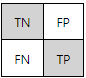

Note that the correct (true) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the false predictions if the model is any good. [Doğru (doğru) tahminlerin sol üstten sağ alta çapraz bir çizgi oluşturduğuna dikkat edin - model herhangi bir iyiyse bu rakamlar yanlış tahminlerden önemli ölçüde yüksek olmalıdır.]

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

In [9]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 601  913]]


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. [Şimdiye kadar, modelden gelen tahminleri 1 veya 0 sınıf etiketleri olarak değerlendirdik.] Actually, things are a little more complex than that. [Aslında, işler bundan biraz daha karmaşık.] Statistical machine learning algorithms, like logistic regression, are based on probability; so what actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). [Lojistik regresyon gibi istatistiksel makine öğrenimi algoritmaları olasılığa dayanır; yani bir ikili sınıflandırıcı tarafından gerçekte tahmin edilen şey, etiketin doğru olma olasılığı (P(y)) ve etiketin yanlış olma olasılığıdır (1 - P(y)).] A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). [Öngörülen etiketin 1 (P(y) > 0,5) veya 0 (P(y) <\u003d 0,5) olduğuna karar vermek için 0,5'lik bir eşik değeri kullanılır.] You can use the predict_proba method to see the probability pairs for each case: [Her bir durum için olasılık çiftlerini görmek için tahmin_proba yöntemini kullanabilirsiniz:]

In [10]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81648224 0.18351776]
 [0.96276583 0.03723417]
 [0.80813779 0.19186221]
 ...
 [0.60685226 0.39314774]
 [0.10771661 0.89228339]
 [0.63961855 0.36038145]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. [Bir tahmini 1 veya 0 olarak puanlama kararı, tahmin edilen olasılıkların karşılaştırıldığı eşiğe bağlıdır.] If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. [Eğer eşiği değiştirecek olsaydık, tahminleri etkilerdi; ve bu nedenle karışıklık matrisindeki metrikleri değiştirin.] A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. [Bir sınıflandırıcıyı değerlendirmenin yaygın bir yolu, bir dizi olası eşik için gerçek pozitif oranı (geri çağırma için başka bir isimdir) ve yanlış pozitif oranı incelemektir.] These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this: [Bu oranlar daha sonra, alınan operatör karakteristik (ROC) tablosu olarak bilinen bir tablo oluşturmak için tüm olası eşiklere karşı çizilir, bunun gibi:]


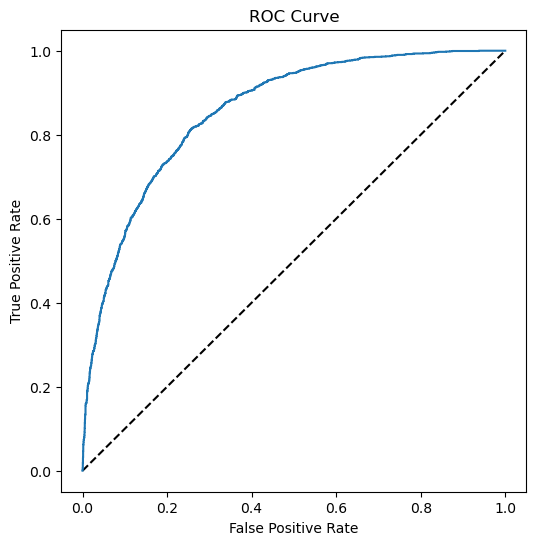

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. [ROC grafiği, 0 ile 1 arasındaki farklı eşik değerleri için doğru ve yanlış pozitif oranların eğrisini gösterir.] A perfect classifier would have a curve that goes straight up the left side and straight across the top. [Mükemmel bir sınıflandırıcı, doğrudan sol taraftan yukarı ve düz üst kısım boyunca uzanan bir eğriye sahip olacaktır.] The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!). [Grafikteki çapraz çizgi, 50/50 rastgele tahminle doğru tahmin yapma olasılığını temsil eder; yani açıkçası eğrinin bundan daha yüksek olmasını istiyorsunuz (veya modeliniz sadece tahmin etmekten daha iyi değil!).]

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. [Eğrinin altındaki alan (AUC), modelin genel performansını ölçen 0 ile 1 arasında bir değerdir.] The closer to 1 this value is, the better the model. [Bu değer 1'e ne kadar yakınsa model o kadar iyidir.] Once again, scikit-Learn includes a function to calculate this metric. [Bir kez daha, scikit-Learn, bu metriği hesaplamak için bir fonksiyon içerir.]

In [12]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.85685665647084


### Perform preprocessing in a pipeline

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data. [Bu durumda, ROC eğrisi ve AUC'si, modelin rastgele bir tahminden daha iyi performans gösterdiğini gösterir; bu, verilerin çok az ön işlemesini gerçekleştirdiğimizi düşünürsek fena değil.]

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. [Pratikte, algoritmanın bir modele uymasını kolaylaştırmak için verilerin bazı ön işlemlerini gerçekleştirmek yaygındır.] There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques: [Verilerinizi modellemeye hazır hale getirmek için gerçekleştirebileceğiniz çok çeşitli ön işleme dönüşümleri vardır, ancak kendimizi birkaç yaygın teknikle sınırlayacağız:]

- Scaling numeric features so they're on the same scale. [Aynı ölçekte olmaları için sayısal özellikleri ölçeklendirme.] This prevents features with large values from producing coefficients that disproportionately affect the predictions. [Bu, büyük değerlere sahip özelliklerin tahminleri orantısız bir şekilde etkileyen katsayılar üretmesini önler.]

- Encoding categorical variables. [Kategorik değişkenleri kodlama.] For example, by using a one hot encoding technique you can create individual binary (true/false) features for each possible category value. [Örneğin, tek bir sıcak kodlama tekniği kullanarak, olası her kategori değeri için ayrı ikili (doğru/yanlış) özellikler oluşturabilirsiniz.]

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named pipelines. [Bu ön işleme dönüşümlerini uygulamak için, işlem hatları adlı bir Scikit-Learn özelliğinden yararlanacağız.] These enable us to define a set of preprocessing steps that end with an algorithm. [Bunlar, bir algoritma ile biten bir dizi ön işleme adımı tanımlamamızı sağlar.] You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. [Ardından, modelin tüm ön işleme adımlarını ve regresyon algoritmasını kapsaması için tüm boru hattını verilere sığdırabilirsiniz.] This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data). [Bu yararlıdır, çünkü modeli yeni verilerden değerleri tahmin etmek için kullanmak istediğimizde, aynı dönüşümleri uygulamamız gerekir (eğitim verileriyle kullanılan aynı istatistiksel dağılımlara ve kategori kodlamalarına dayanarak).]

**Note**: The term pipeline is used extensively in machine learning, often to mean very different things! [Not: İşlem hattı terimi, makine öğreniminde yaygın olarak kullanılır ve genellikle çok farklı anlamlara gelir!] In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else. [Bu bağlamda, bunu Scikit-Learn'deki ardışık düzen nesnelerine atıfta bulunmak için kullanıyoruz, ancak başka bir yerde başka bir şey ifade etmek için kullanıldığını görebilirsiniz.]

In [13]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training. [İşlem hattı, model eğitiminin yanı sıra ön işleme adımlarını da kapsar.]

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously. [Test setimiz için etiketleri tahmin etmek için bu ardışık düzen tarafından eğitilen modeli kullanalım ve performans ölçümlerini daha önce oluşturduğumuz temel modelle karşılaştıralım.]

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202436115345854


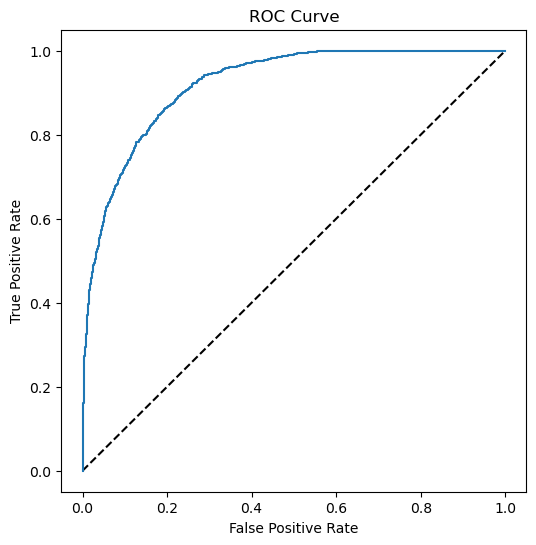

In [14]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The results look a little better, so clearly preprocessing the data has made a difference.

### Try a different algorithm

Now let's try a different algorithm. [Şimdi farklı bir algoritma deneyelim.] Previously we used a logistic regression algorithm, which is a linear algorithm. [Daha önce doğrusal bir algoritma olan bir lojistik regresyon algoritması kullandık.] There are many kinds of classification algorithm we could try, including: [Deneyebileceğimiz birçok sınıflandırma algoritması türü vardır:]

- **Support Vector Machine algorithms**: Algorithms that define a hyperplane that separates classes. [Destek Vektör Makinesi algoritmaları: Sınıfları ayıran bir hiper düzlemi tanımlayan algoritmalar.]

- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction [Ağaç tabanlı algoritmalar: Bir tahmine ulaşmak için bir karar ağacı oluşturan algoritmalar]

- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability. [Topluluk algoritmaları: Genelleştirilebilirliği geliştirmek için çoklu temel algoritmaların çıktılarını birleştiren algoritmalar.]

This time, We'll use the same preprocessing steps as before, but we'll train the model using an ensemble algorithm named Random Forest that combines the outputs of multiple random decision trees (for more details, see the Scikit-Learn documentation). [Bu sefer, öncekiyle aynı ön işleme adımlarını kullanacağız, ancak modeli, birden çok rastgele karar ağacının çıktılarını birleştiren Random Forest adlı bir topluluk algoritması kullanarak eğiteceğiz (daha fazla ayrıntı için Scikit-Learn belgelerine bakın).]

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Let's look at the performance metrics for the new model.

Confusion Matrix:
 [[2851  135]
 [ 172 1342]] 

Accuracy: 0.9317777777777778
Overall Precision: 0.9085985104942451
Overall Recall: 0.8863936591809776

AUC: 0.9817220565191501


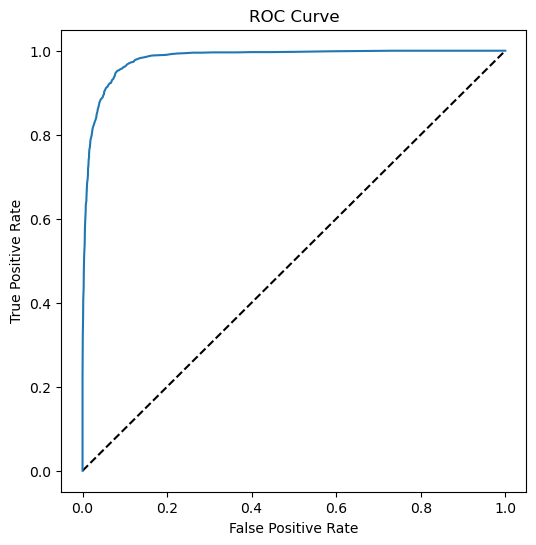

In [16]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

That looks better!

### Use the Model for Inferencing

Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [17]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

In [18]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


### Summary

In this notebook, we looked at the basics of binary classification. We will move onto more complex classification problems in the following notebook.